In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. READ DATA

In [3]:
data = pd.read_csv('/content/drive/MyDrive/cicddos2019_dataset.csv')
data.head(10)

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
5,5,17,48,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
6,6,17,1,2,0,766.0,0.0,383.0,383.0,383.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
7,7,17,109142,4,0,1438.0,0.0,389.0,330.0,359.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
8,8,17,1,2,0,802.0,0.0,401.0,401.0,401.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
9,9,17,215834,6,0,2088.0,0.0,393.0,321.0,348.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [4]:
data.columns

Index(['Unnamed: 0', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 80 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                431371 non-null  int64  
 1   Protocol                  431371 non-null  int64  
 2   Flow Duration             431371 non-null  int64  
 3   Total Fwd Packets         431371 non-null  int64  
 4   Total Backward Packets    431371 non-null  int64  
 5   Fwd Packets Length Total  431371 non-null  float64
 6   Bwd Packets Length Total  431371 non-null  float64
 7   Fwd Packet Length Max     431371 non-null  float64
 8   Fwd Packet Length Min     431371 non-null  float64
 9   Fwd Packet Length Mean    431371 non-null  float64
 10  Fwd Packet Length Std     431371 non-null  float64
 11  Bwd Packet Length Max     431371 non-null  float64
 12  Bwd Packet Length Min     431371 non-null  float64
 13  Bwd Packet Length Mean    431371 non-null  f

In [6]:
data.describe()

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,431371.000000,431371.000000,4.313710e+05,431371.000000,431371.000000,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.000000,...,431371.000000,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05
mean,126835.311055,13.948694,8.404856e+06,24.139117,2.472021,9.416956e+03,1.632896e+03,357.483674,294.721646,324.915327,...,21.893124,-2.315406e+07,3.370905e+04,2.563697e+04,6.757181e+04,1.868363e+04,2.449924e+06,4.983262e+05,2.971142e+06,1.993859e+06
std,87249.615423,4.966712,2.126596e+07,195.888896,56.370208,3.445253e+04,1.064056e+05,320.025929,273.298705,268.577313,...,54.559772,1.551755e+08,3.223119e+05,2.226543e+05,5.183739e+05,2.832011e+05,7.914010e+06,2.005164e+06,9.045327e+06,7.245561e+06
min,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53921.000000,6.000000,7.870000e+02,4.000000,0.000000,7.800000e+01,0.000000e+00,37.000000,6.000000,32.000000,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,107842.000000,17.000000,4.480400e+04,4.000000,0.000000,2.064000e+03,0.000000e+00,440.000000,330.000000,428.000000,...,3.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,198357.500000,17.000000,3.002508e+06,16.000000,2.000000,5.160000e+03,0.000000e+00,516.000000,516.000000,516.000000,...,13.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,306200.000000,17.000000,1.199987e+08,86666.000000,31700.000000,1.526642e+07,5.842950e+07,32120.000000,2131.000000,3015.290500,...,18766.000000,6.724045e+07,4.050800e+07,2.135244e+07,4.553668e+07,4.050800e+07,1.192194e+08,6.961402e+07,1.192194e+08,1.192194e+08


In [7]:
data.isnull().sum()

Unnamed: 0                0
Protocol                  0
Flow Duration             0
Total Fwd Packets         0
Total Backward Packets    0
                         ..
Idle Std                  0
Idle Max                  0
Idle Min                  0
Label                     0
Class                     0
Length: 80, dtype: int64

#2. PREPARE DATA

In [8]:
def Value_union(train_df, name_column):
  return train_df[name_column].value_counts()

# Tạo một danh sách các tên cột cần tính toán.
name_columns = list(data.columns)

# Tính toán giá trị không lặp lại của từng cột và lưu vào một biến.
value_unions = {}
for name_column in name_columns:
  value_unions[name_column] = Value_union(data, name_column)

# In giá trị không lặp lại của từng cột.
for name_column, value_union in value_unions.items():
  print(f"Giá trị không lặp lại của cột {name_column}:\n{value_union}")
  print("\n------------------------------------------------------------------------------------------")

Giá trị không lặp lại của cột Unnamed: 0:
0         2
83457     2
83455     2
83454     2
83453     2
         ..
185515    1
185516    1
185517    1
185518    1
306200    1
Name: Unnamed: 0, Length: 306201, dtype: int64

------------------------------------------------------------------------------------------
Giá trị không lặp lại của cột Protocol:
17    312668
6     116951
0       1752
Name: Protocol, dtype: int64

------------------------------------------------------------------------------------------
Giá trị không lặp lại của cột Flow Duration:
1            16745
2             7432
3             2330
48            1721
49            1363
             ...  
87223077         1
419044           1
419337           1
113285426        1
322010           1
Name: Flow Duration, Length: 160843, dtype: int64

------------------------------------------------------------------------------------------
Giá trị không lặp lại của cột Total Fwd Packets:
4       110467
2        83826
6        390

In [9]:
#xóa những cột không quá ảnh hưởng đến bài trên train_df
data = data.drop(labels ='Bwd PSH Flags',axis = 1)
data = data.drop(labels ='Fwd URG Flags',axis = 1)
data = data.drop(labels ='Bwd URG Flags',axis = 1)
data = data.drop(labels ='FIN Flag Count',axis = 1)
data = data.drop(labels ='SYN Flag Count',axis = 1)
data = data.drop(labels ='PSH Flag Count',axis = 1)
data = data.drop(labels ='ECE Flag Count',axis = 1)
data = data.drop(labels ='Fwd Avg Bytes/Bulk',axis = 1)
data = data.drop(labels ='Fwd Avg Packets/Bulk',axis = 1)
data = data.drop(labels ='Fwd Avg Bulk Rate',axis = 1)
data = data.drop(labels ='Bwd Avg Bytes/Bulk',axis = 1)
data = data.drop(labels ='Bwd Avg Packets/Bulk',axis = 1)
data = data.drop(labels ='Bwd Avg Bulk Rate',axis = 1)

In [10]:
#Phân loại những data có kiểu category
#change Dtype
features = ["Protocol","Fwd PSH Flags","RST Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count","Label","Class"]
def convert_cat(df,features) :
  for feature in features :
    df[feature] = df[feature].astype("category")
convert_cat(data, features)


In [11]:
# category column statistic
data.describe(include = ['category'])

,Protocol,Fwd PSH Flags,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Label,Class
count,431371,431371,431371,431371,431371,431371,431371,431371
unique,3,2,2,2,2,2,18,2
top,17,0,0,0,0,0,DrDoS_NTP,Attack
freq,312668,419658,419658,355273,390431,410386,121368,333540


<ipython-input-12-579dc9ef05a5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr().round(4)
<ipython-input-12-579dc9ef05a5>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat,dtype=np.bool)


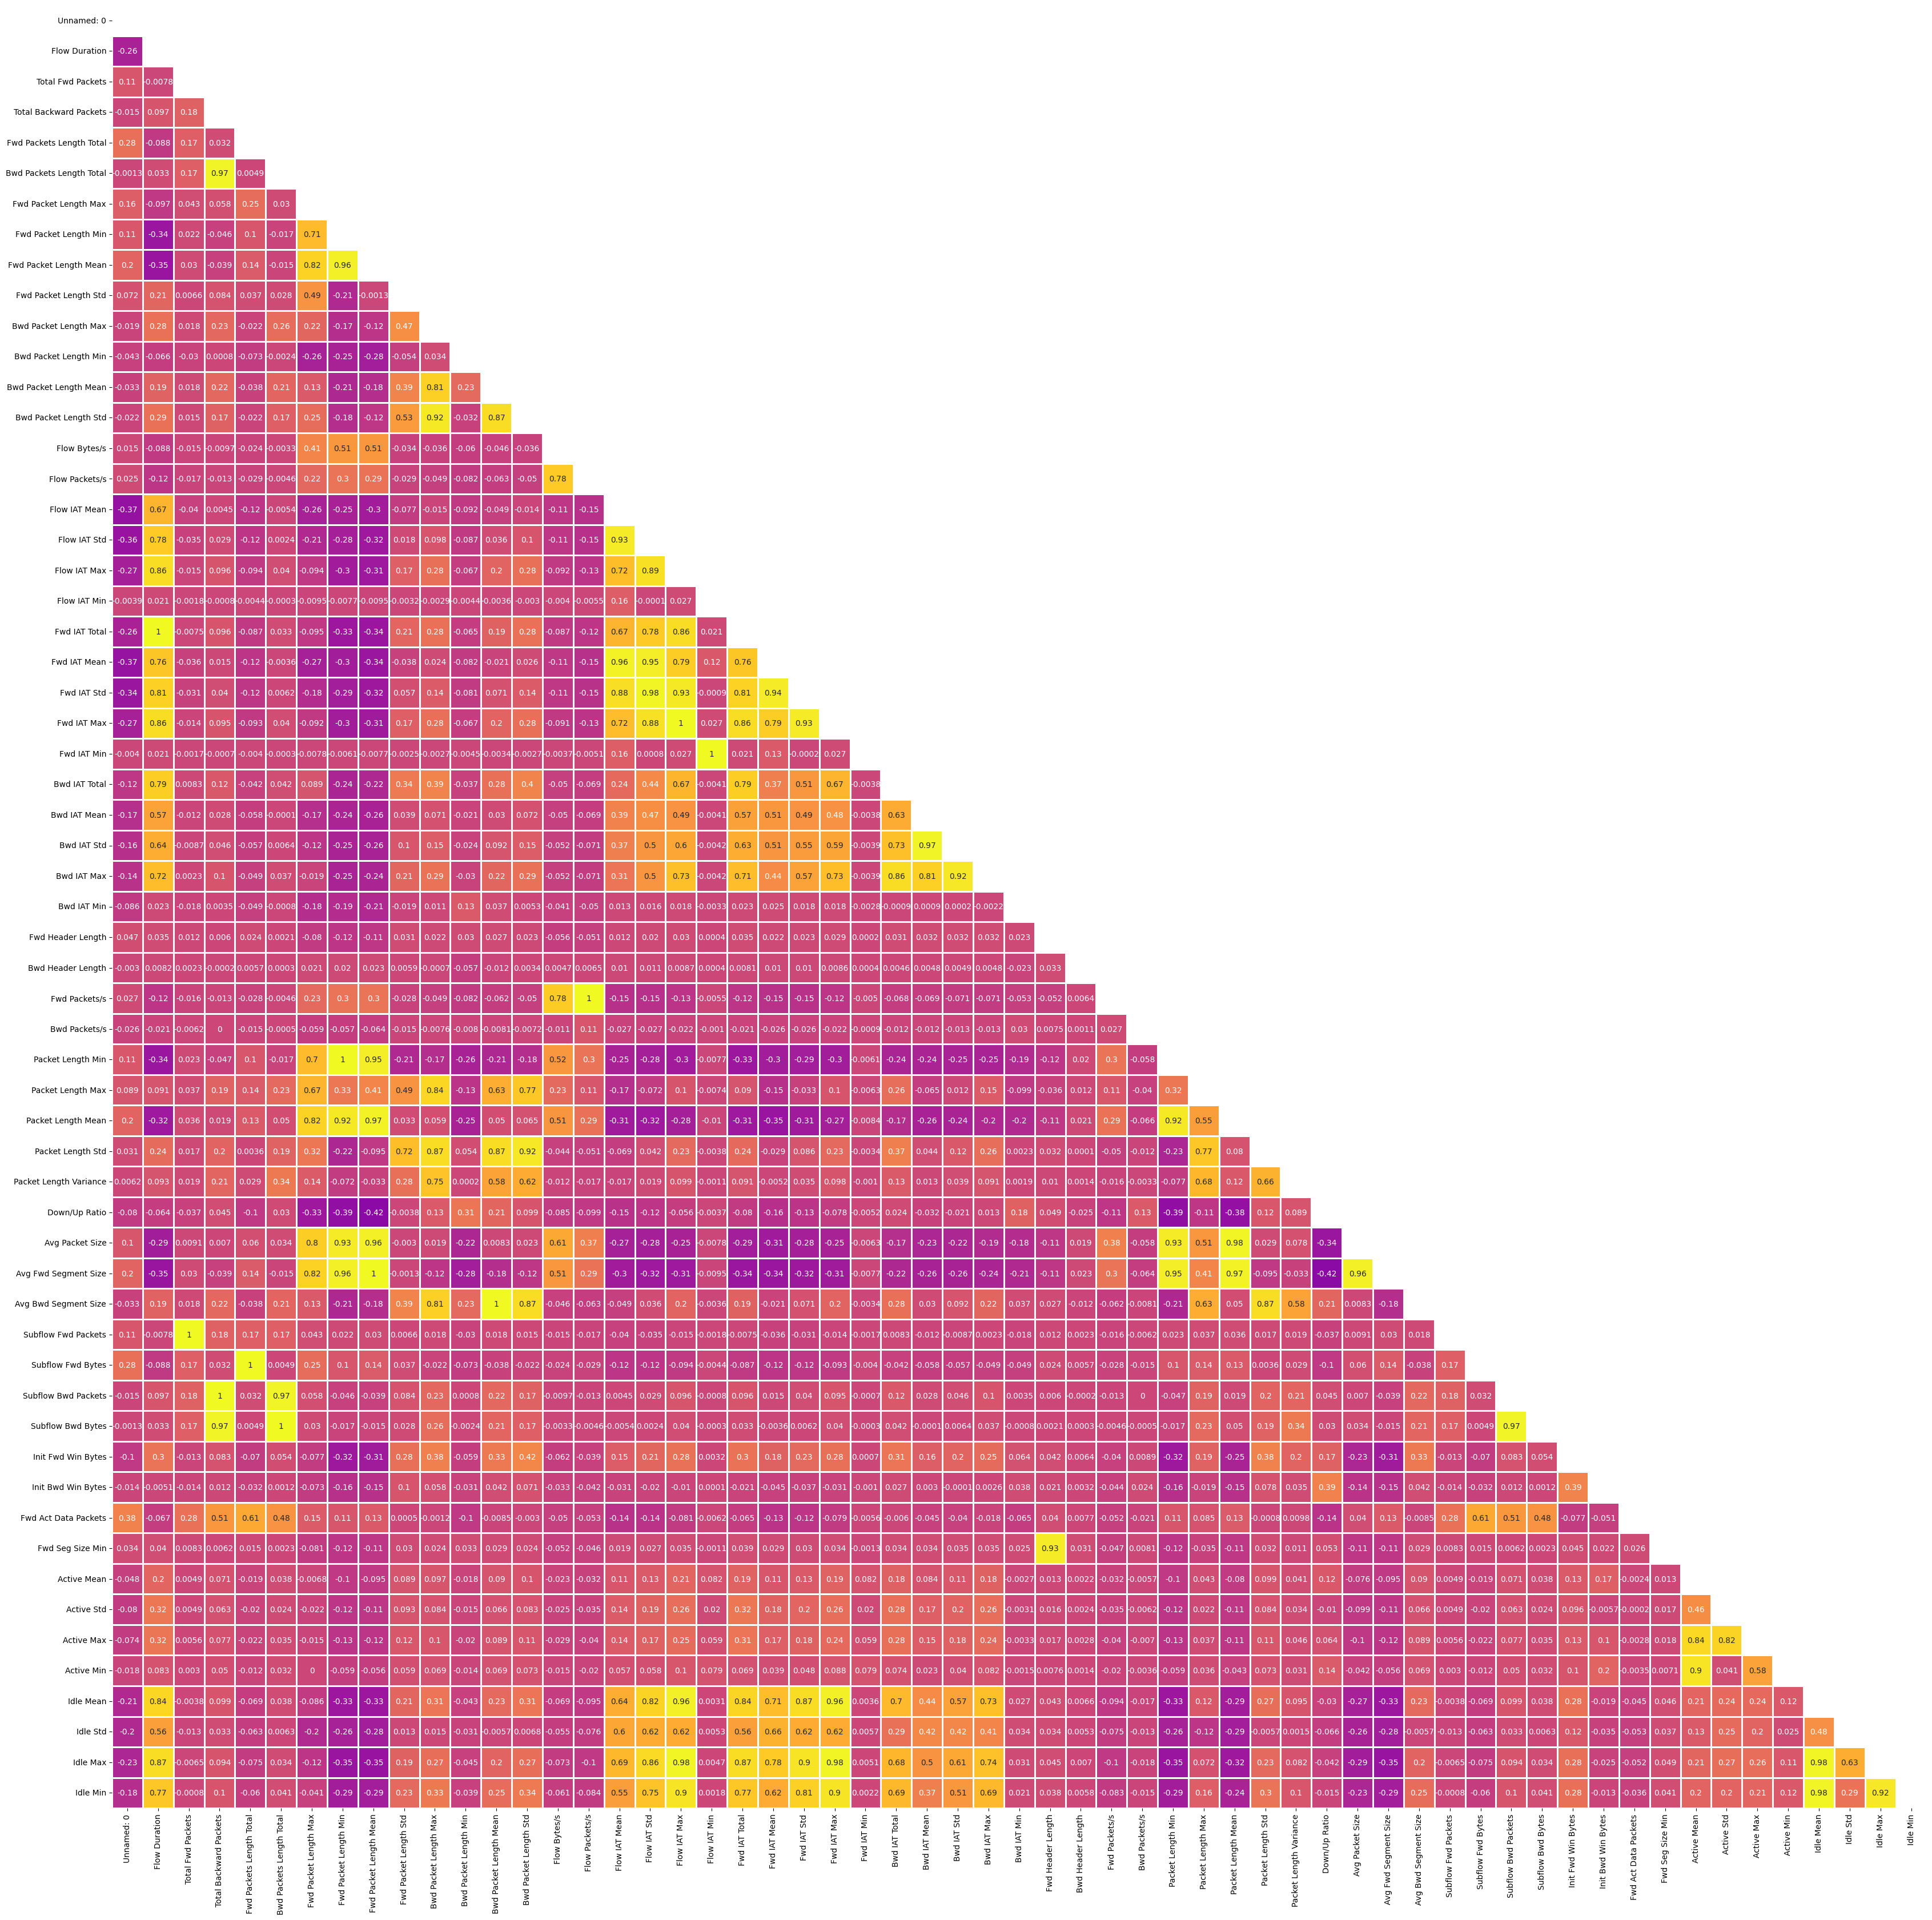

In [12]:
# biểu diễn sự tương quan của các cột qua biểu đồ nhiệt

def corrMat(df,id=False):

    corr_mat = df.corr().round(4)
    f, ax = plt.subplots(figsize=(41,41))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0,cmap='plasma',square=False,lw=2,annot=True,cbar=False);
    plt.show();
corrMat(data)

In [13]:
#xóa những cột có tương quan 1 hay gần tới 1 (quá mạnh) với một cột khác trên data
data = data.drop(labels ='Fwd IAT Total',axis = 1)
data = data.drop(labels ='Fwd IAT Std',axis = 1)
data = data.drop(labels ='Fwd IAT Max',axis = 1)
data = data.drop(labels ='Fwd IAT Min',axis = 1)
data = data.drop(labels ='Fwd IAT Mean',axis = 1)
data = data.drop(labels ='Bwd IAT Mean',axis = 1)
data = data.drop(labels ='Subflow Fwd Packets',axis = 1)
data = data.drop(labels ='Subflow Bwd Packets',axis = 1)
data = data.drop(labels ='Subflow Fwd Bytes',axis = 1)
data = data.drop(labels ='Subflow Bwd Bytes',axis = 1)
data = data.drop(labels ='Fwd Packet Length Min',axis = 1)
data = data.drop(labels ='Fwd Packet Length Mean',axis = 1)
data = data.drop(labels ='Bwd Packet Length Mean',axis = 1)
data = data.drop(labels ='Bwd Packets Length Total',axis = 1)
data = data.drop(labels ='Avg Fwd Segment Size',axis = 1)
data = data.drop(labels ='Avg Bwd Segment Size',axis = 1)
data = data.drop(labels ='Fwd Packets/s',axis = 1)
data = data.drop(labels ='Idle Mean',axis = 1)
data = data.drop(labels ='Idle Max',axis = 1)
data = data.drop(labels ='Packet Length Mean',axis = 1)

<ipython-input-14-9e077c56a3f2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr().round(4)
<ipython-input-14-9e077c56a3f2>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat,dtype=np.bool)


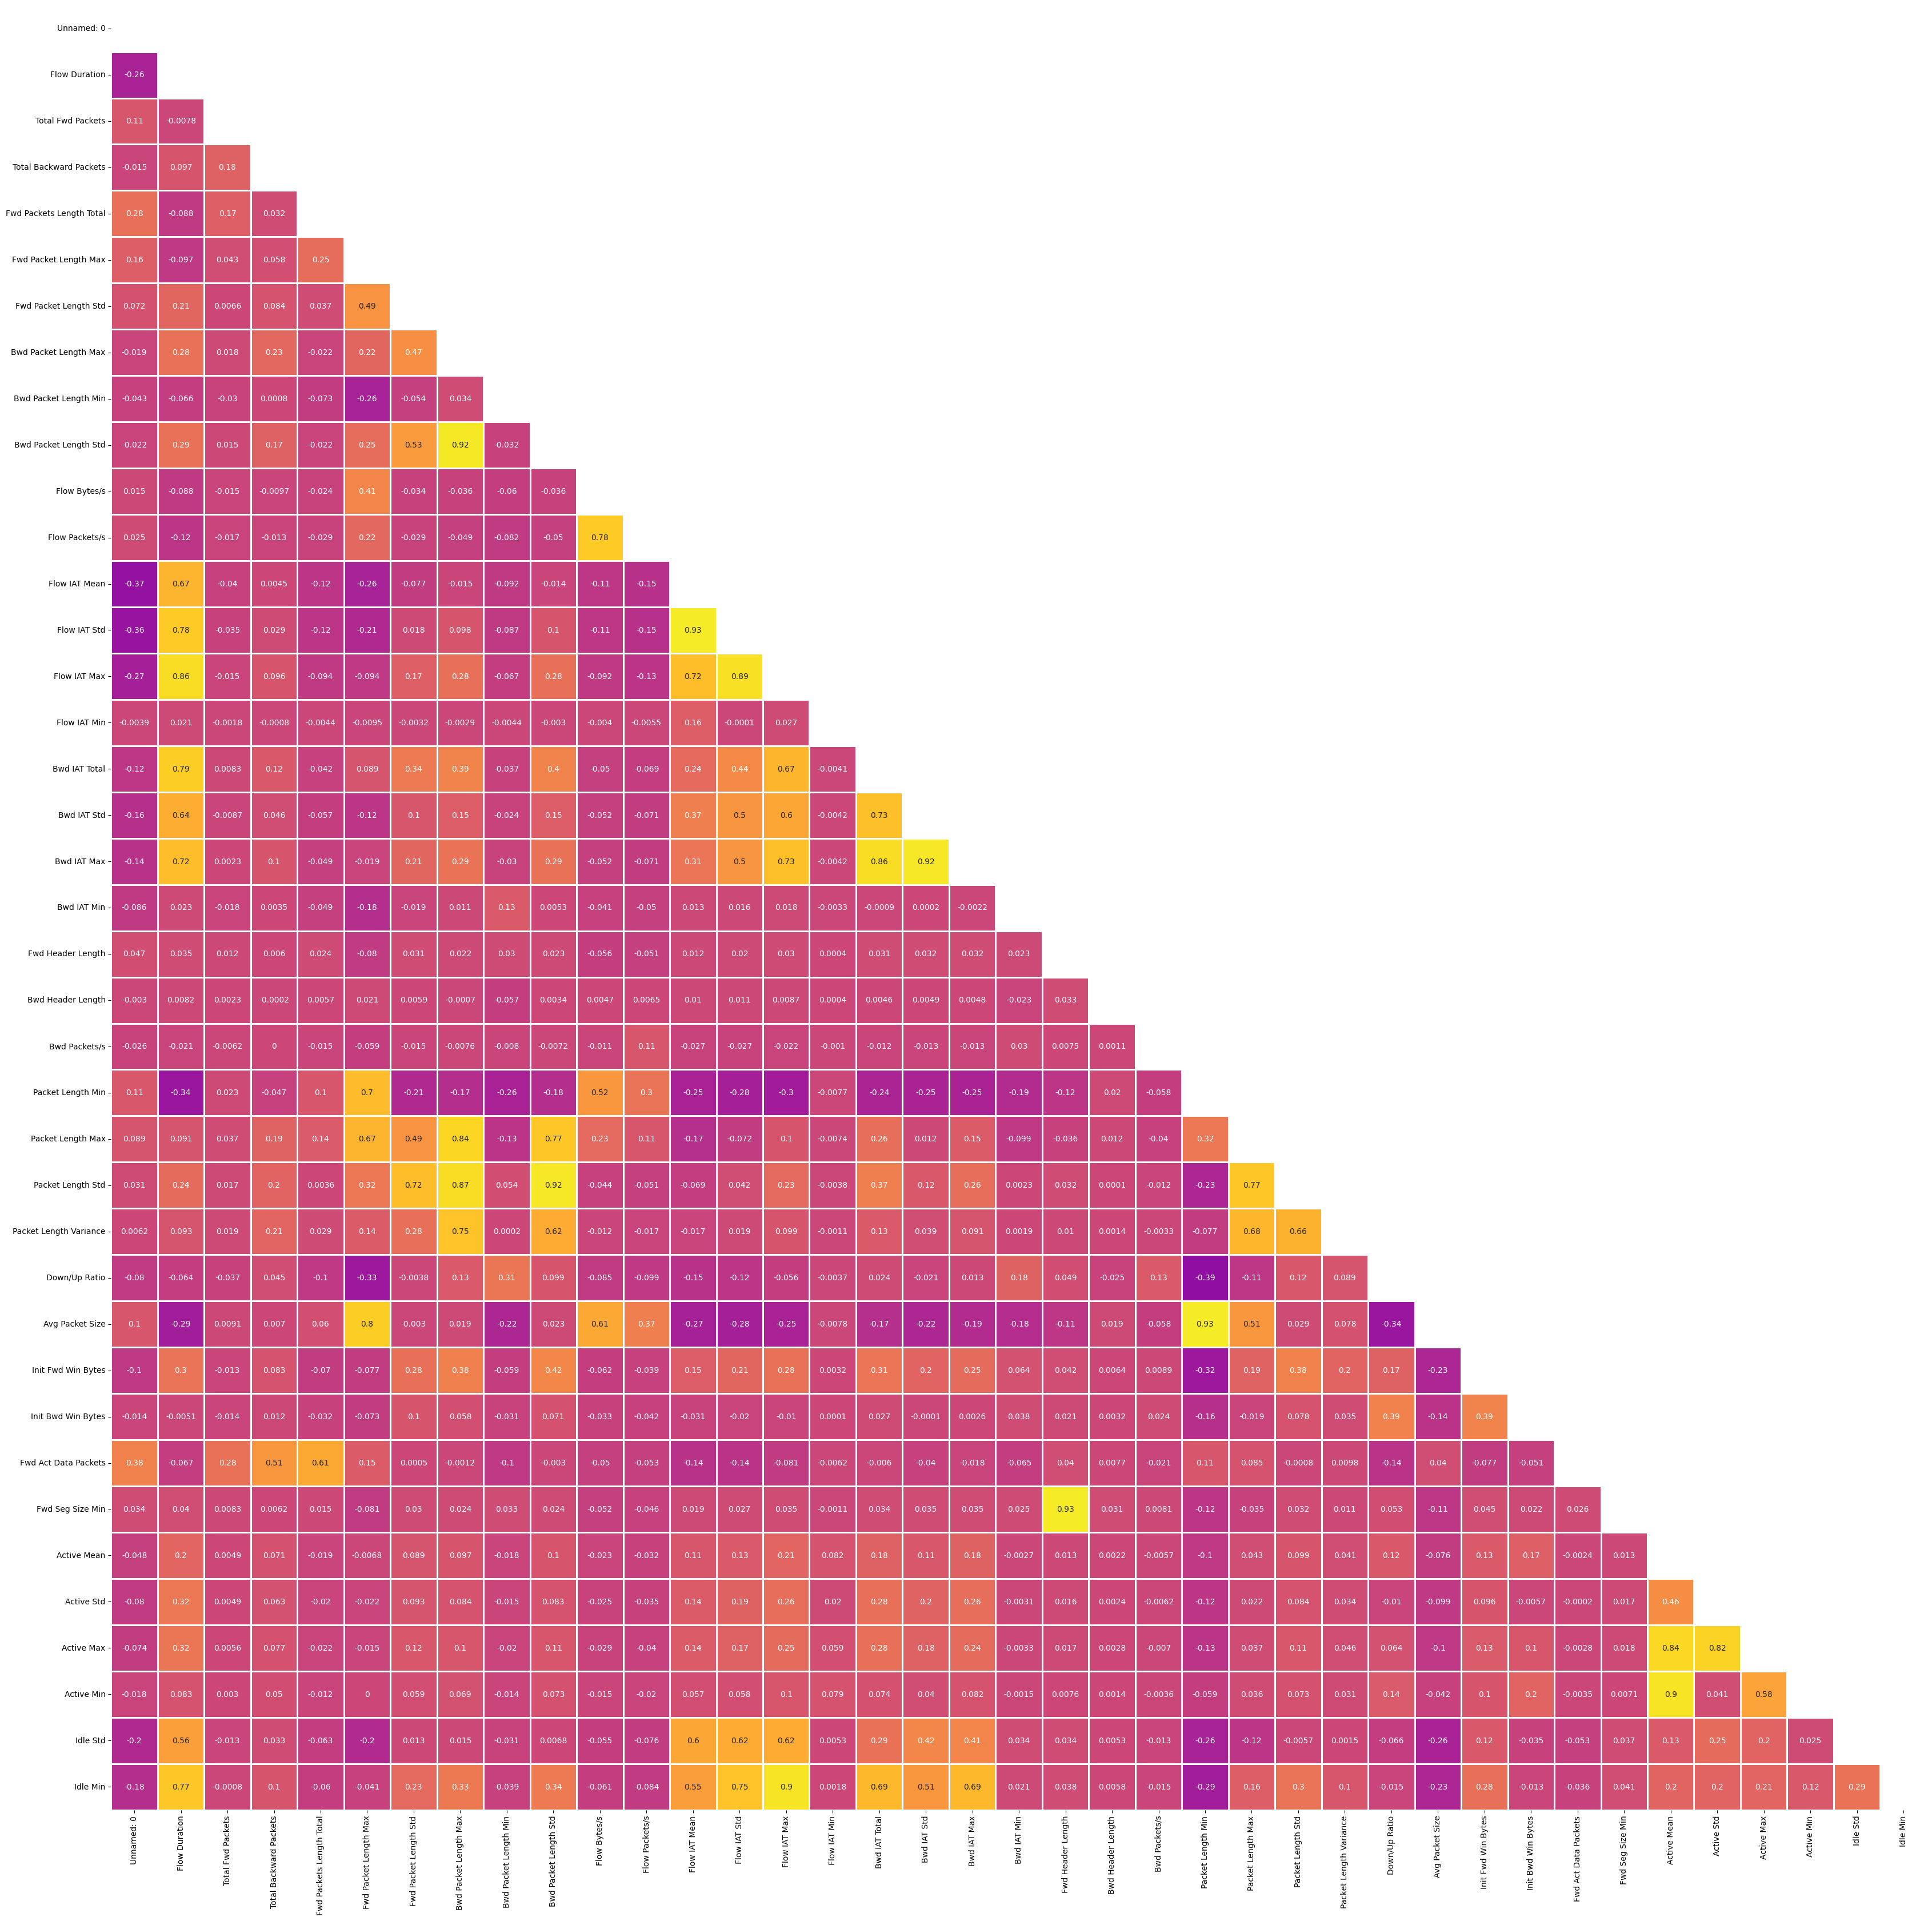

In [14]:
# biểu diễn sự tương quan của các cột sau khi xóa qua biểu đồ nhiệt

def corrMat(df,id=False):

    corr_mat = df.corr().round(4)
    f, ax = plt.subplots(figsize=(41,41))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0,cmap='plasma',square=False,lw=2,annot=True,cbar=False);
    plt.show();
corrMat(data)

In [15]:
#do dữ liệu dạng chuỗi không quá ảnh hưởng đến kết quả
data = data.drop(labels ='Label',axis = 1)

In [16]:
#các cột còn lại sau khi điều chỉnh
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431371 entries, 0 to 431370
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Unnamed: 0                431371 non-null  int64   
 1   Protocol                  431371 non-null  category
 2   Flow Duration             431371 non-null  int64   
 3   Total Fwd Packets         431371 non-null  int64   
 4   Total Backward Packets    431371 non-null  int64   
 5   Fwd Packets Length Total  431371 non-null  float64 
 6   Fwd Packet Length Max     431371 non-null  float64 
 7   Fwd Packet Length Std     431371 non-null  float64 
 8   Bwd Packet Length Max     431371 non-null  float64 
 9   Bwd Packet Length Min     431371 non-null  float64 
 10  Bwd Packet Length Std     431371 non-null  float64 
 11  Flow Bytes/s              431371 non-null  float64 
 12  Flow Packets/s            431371 non-null  float64 
 13  Flow IAT Mean             431

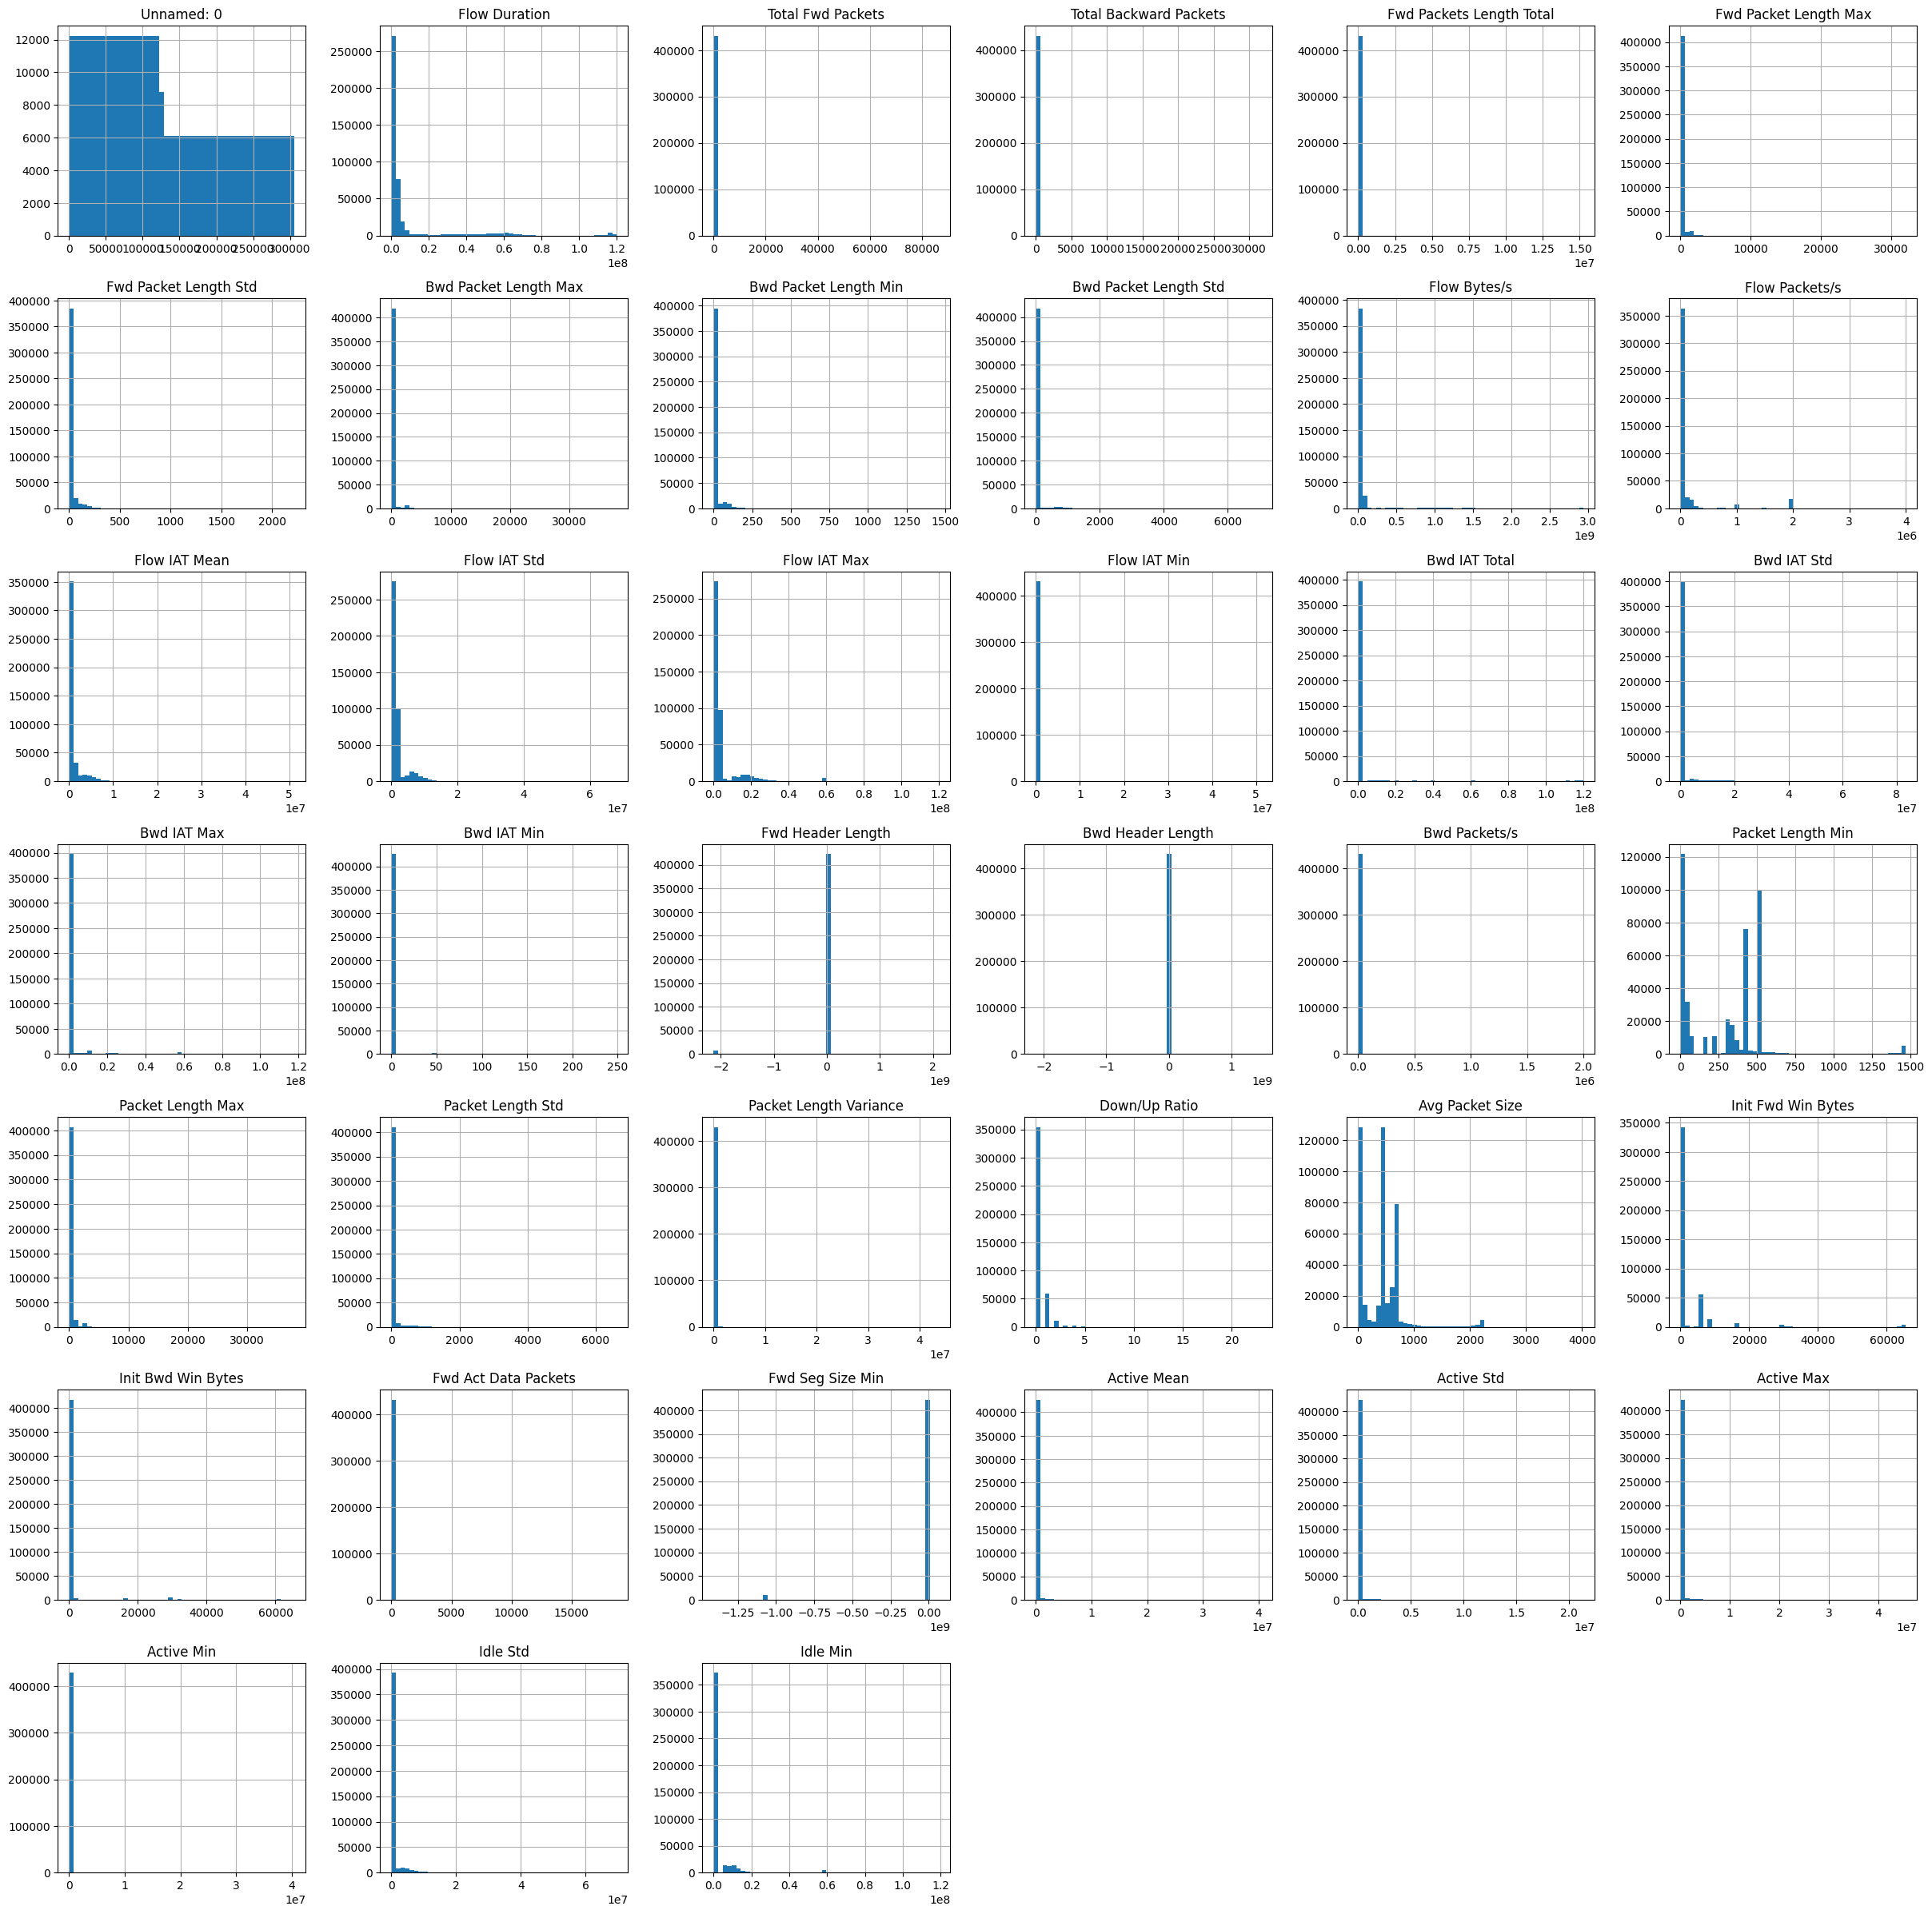

In [17]:
#sự phân phối giá trị của các thuộc tính dạng cột
data.hist(bins = 50, figsize=(30,30));

Text(0.5, 1.0, 'IP Protocol')

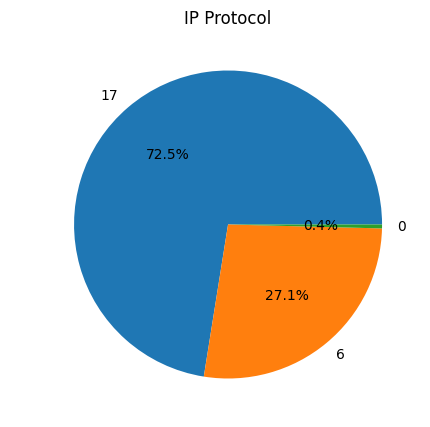

In [18]:
#biểu diễn số lượng IP protocol trong bộ dữ liệu
grouped_df = (data.groupby('Protocol').size()/len(data))*100

grouped_df = grouped_df.sort_values(ascending=False)

fig = plt.figure(figsize=(5,5))
grouped_df.plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("IP Protocol")

Text(0.5, 1.0, 'Labels')

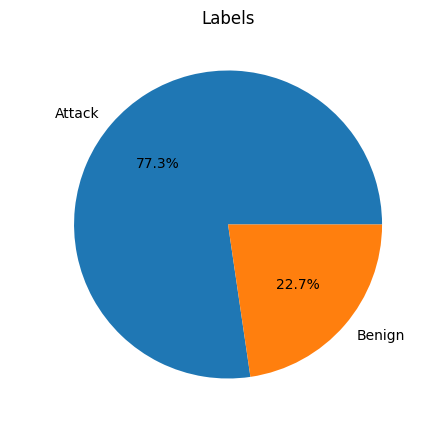

In [19]:
#biểu diễn số lượng nhãn trong bộ dữ liệu
grouped_df = (data.groupby('Class').size()/len(data))*100

grouped_df = grouped_df.sort_values(ascending=False)

fig = plt.figure(figsize=(5,5))
grouped_df.plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("Labels")

#Cân bằng nhãn

In [20]:
#chuyển nhãn thành dạng số
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['Class']= label_encoder.fit_transform(data['Class'])

data['Class'].unique()

array([0, 1])

In [21]:
#chia dataset thành 2 phần dữ liệu và nhãn
feature_cols = [i for i in data if i != 'Class']
x = data[feature_cols]
y = data['Class']

In [22]:
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.datasets import make_classification
import pandas as pd

In [192]:
print('Dữ liệu trước khi áp dụng SMOTEENN:', Counter(y))

Dữ liệu trước khi áp dụng SMOTEENN: Counter({0: 333540, 1: 97831})


In [23]:
# Áp dụng SMOTEENN để cân bằng tập dữ liệu
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(x, y)

print('Dữ liệu sau khi áp dụng SMOTEENN:', Counter(y_resampled))

Dữ liệu sau khi áp dụng SMOTEENN: Counter({1: 331828, 0: 331601})


In [24]:
X_resampled.isnull().sum()

Unnamed: 0                     0
Protocol                    2461
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Fwd Packets Length Total       0
Fwd Packet Length Max          0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Bwd IAT Total                  0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd PSH Flags               5186
Fwd Header Length              0
Bwd Header Length              0
Bwd Packets/s                  0
Packet Length Min              0
Packet Length Max              0
Packet Length Std              0
Packet Length Variance         0
RST Flag Count              5186
ACK Flag C

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [26]:
imputer.fit(X_resampled)

SimpleImputer(strategy='median')

In [27]:
F = imputer.transform(X_resampled)
X_resampled_f = pd.DataFrame(F, columns=X_resampled.columns)

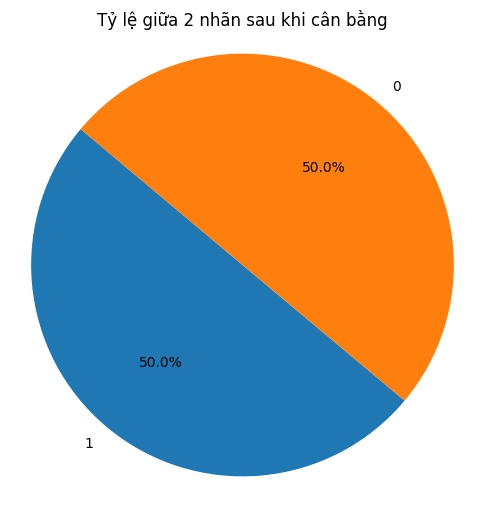

In [193]:
y_label = pd.DataFrame(y_resampled, columns=['Class'])

# Tính toán số lượng mỗi nhãn trong array
label_counts = y_label['Class'].value_counts()

# Vẽ biểu đồ hình tròn thể hiện phân phối nhãn
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ giữa 2 nhãn sau khi cân bằng')
plt.axis('equal')  # Để biểu đồ tròn thực sự là hình tròn

# Hiển thị biểu đồ
plt.show()

In [187]:
y_resampled

0         0
1         0
2         0
3         0
4         0
         ..
663424    1
663425    1
663426    1
663427    1
663428    1
Name: Class, Length: 663429, dtype: int64

In [53]:
file_path = '/content/drive/MyDrive/X_resampled_f.csv'
X_resampled_f.to_csv(file_path, index=False)

In [54]:
file_path = '/content/drive/MyDrive/y_resampled.csv'
y_resampled.to_csv(file_path, index=False)

#Rút trích đặc trưng

Feature ranking:
1. Feature 25: 0.1728344888076111
2. Feature 24: 0.08933203472954146
3. Feature 34: 0.07633645570631806
4. Feature 4: 0.07018078945227846
5. Feature 23: 0.06307065510319805
6. Feature 31: 0.03227277922342665
7. Feature 37: 0.029296009169580896
8. Feature 36: 0.02874374354254837
9. Feature 20: 0.02871351216351241
10. Feature 19: 0.027881753947759273
11. Feature 5: 0.026439366083180257
12. Feature 33: 0.025517644070348632
13. Feature 26: 0.024303565648443076
14. Feature 6: 0.021759461006135284
15. Feature 35: 0.02170102897485398
16. Feature 30: 0.021161214845896562
17. Feature 13: 0.019915924974338448
18. Feature 8: 0.01755280549140785
19. Feature 15: 0.016301780898970317
20. Feature 12: 0.015707983089295028
21. Feature 1: 0.013994741538799175
22. Feature 3: 0.01297741507679611
23. Feature 27: 0.012572509457926427
24. Feature 17: 0.01089819263982124
25. Feature 14: 0.01085326143101336
26. Feature 43: 0.010580982389778601
27. Feature 2: 0.010540035585819537
28. Feature 16

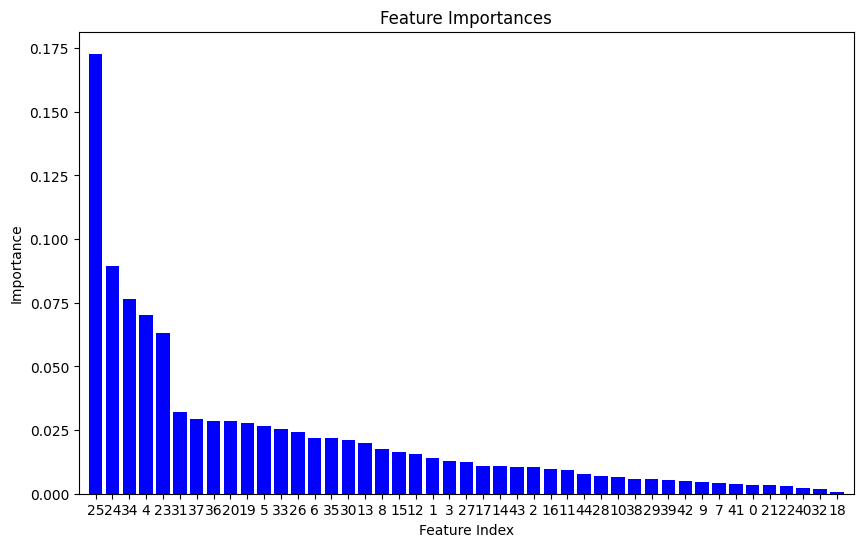

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_resampled_f, y_resampled)

# Lấy độ quan trọng của các đặc trưng từ mô hình
feature_importances = model.feature_importances_

# Sắp xếp các đặc trưng theo độ quan trọng
indices = np.argsort(feature_importances)[::-1]

# In ra độ quan trọng của các đặc trưng theo thứ tự giảm dần
print("Feature ranking:")
for f in range(X_resampled_f.shape[1]):
    print(f"{f + 1}. Feature {indices[f]}: {feature_importances[indices[f]]}")

# Trực quan hóa độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_resampled_f.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X_resampled_f.shape[1]), indices)
plt.xlim([-1, X_resampled_f.shape[1]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

In [180]:
# Chọn số lượng cột quan trọng cần giữ lại
num_top_features = 5

# Tạo DataFrame mới chỉ chứa các cột quan trọng nhất
important_feature_indices = feature_importances.argsort()[::-1][:num_top_features]
X_important_features = X_resampled_f.iloc[:, important_feature_indices]

X_important_features_df = pd.DataFrame(X_important_features)
X_important_features_df

,Packet Length Min,Bwd Packets/s,Avg Packet Size,Total Backward Packets,Bwd Header Length
0,321.000000,0.000000,401.500000,0.0,0.0
1,401.000000,0.000000,601.500000,0.0,0.0
2,383.000000,0.000000,574.500000,0.0,0.0
3,330.000000,0.000000,432.000000,0.0,0.0
4,330.000000,0.000000,442.000000,0.0,0.0
...,...,...,...,...,...
663424,35.111552,96.297444,57.793824,2.0,40.0
663425,0.000000,31792.451304,0.000000,2.0,64.0
663426,46.100133,96.772426,69.825052,2.0,64.0
663427,0.000000,32.166623,38.333332,2.0,40.0


#3. Train model

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_f, y_resampled, test_size = 0.3)

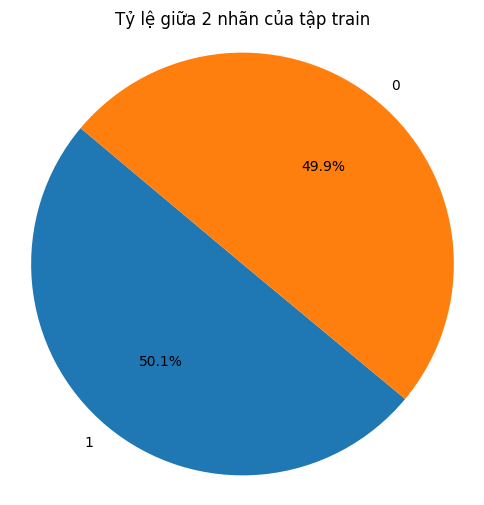

In [195]:
y_train_label = pd.DataFrame(y_train, columns=['Class'])

# Tính toán số lượng mỗi nhãn trong array
label_counts = y_train_label['Class'].value_counts()

# Vẽ biểu đồ hình tròn thể hiện phân phối nhãn
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ giữa 2 nhãn của tập train')
plt.axis('equal')  # Để biểu đồ tròn thực sự là hình tròn

# Hiển thị biểu đồ
plt.show()

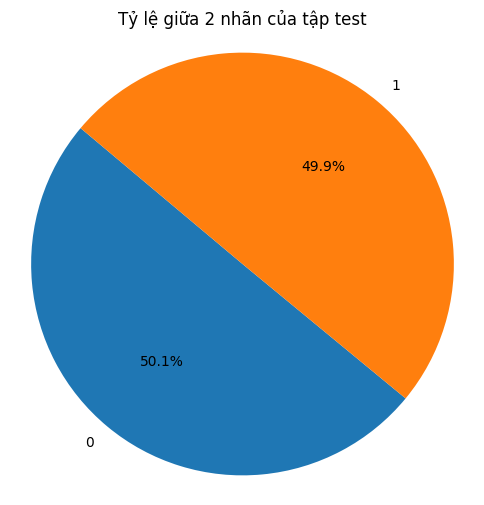

In [196]:
y_test_label = pd.DataFrame(y_test, columns=['Class'])

# Tính toán số lượng mỗi nhãn trong array
label_counts = y_test_label['Class'].value_counts()

# Vẽ biểu đồ hình tròn thể hiện phân phối nhãn
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tỷ lệ giữa 2 nhãn của tập test')
plt.axis('equal')  # Để biểu đồ tròn thực sự là hình tròn

# Hiển thị biểu đồ
plt.show()

In [154]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, mean_absolute_error, make_scorer , accuracy_score

# Showing Confusion Matrix

def plot_cm(y_true, y_pred, title):
    figsize=(14,14)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

#RandomForest

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
model = RandomForestClassifier()

In [157]:
import time

curr_time= time.time()
model.fit(X_train, y_train)
next_time = time.time()

In [158]:
#thời gian huấn luyện mô hình
next_time - curr_time

139.49713325500488

In [159]:
y_pred = model.predict(X_test)

In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99793
           1       1.00      1.00      1.00     99236

    accuracy                           1.00    199029
   macro avg       1.00      1.00      1.00    199029
weighted avg       1.00      1.00      1.00    199029



0.9999045358168719

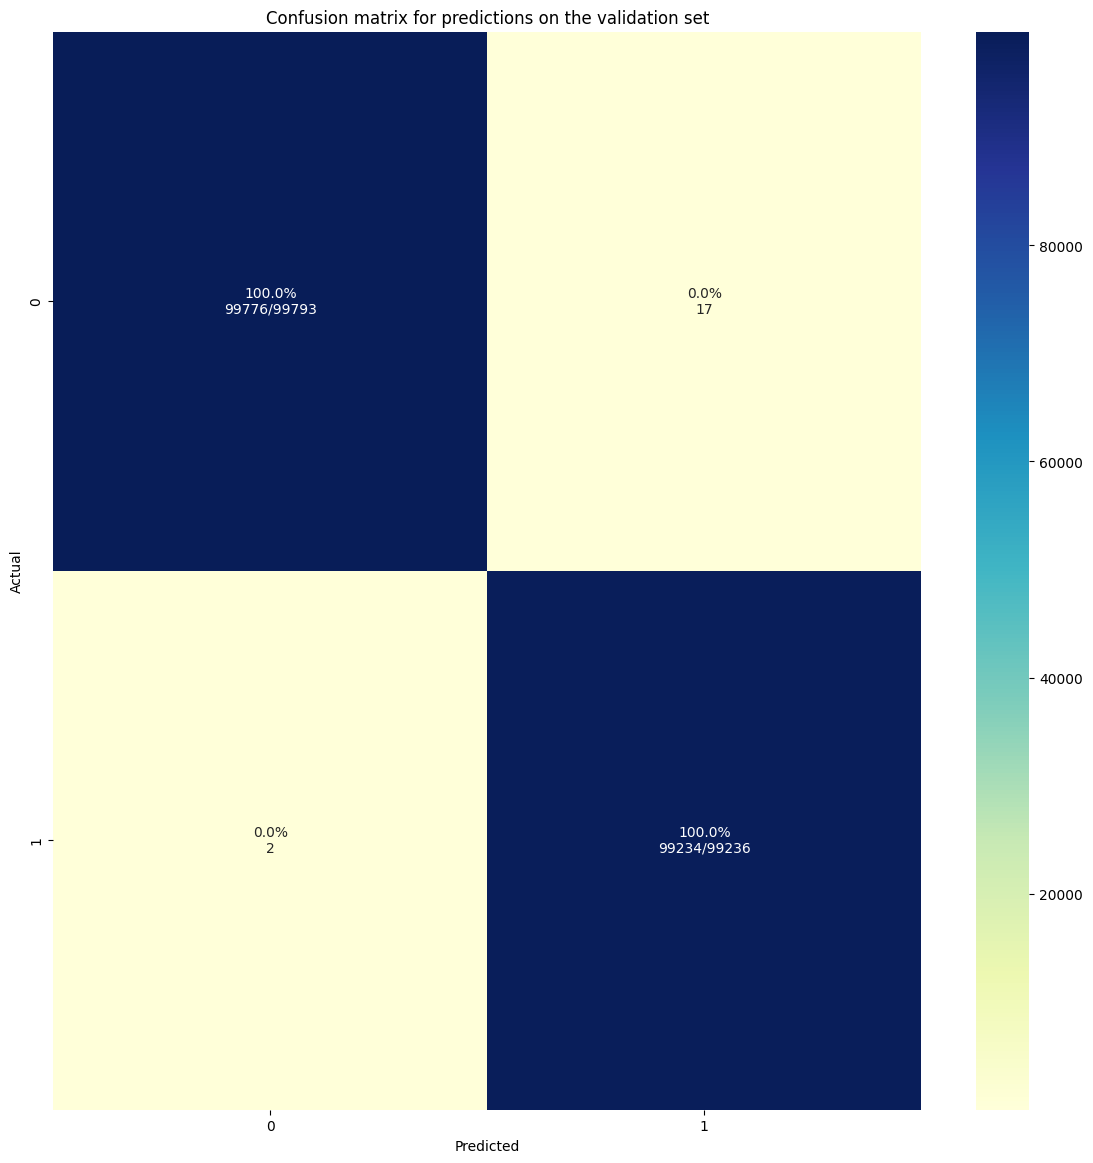

In [161]:
plot_cm(y_test,y_pred, 'Confusion matrix for predictions on the validation set')
f1_score(y_test, y_pred, average = 'macro')

#Naive_bayes

In [162]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [163]:
import time

curr_time= time.time()
nb.fit(X_train,y_train)
next_time = time.time()

In [164]:
#thời gian huấn luyện mô hình
next_time - curr_time

0.42629313468933105

In [165]:
y_pred = nb.predict(X_test)

In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.97      0.70     99793
           1       0.88      0.21      0.34     99236

    accuracy                           0.59    199029
   macro avg       0.72      0.59      0.52    199029
weighted avg       0.72      0.59      0.52    199029



0.5232447351881959

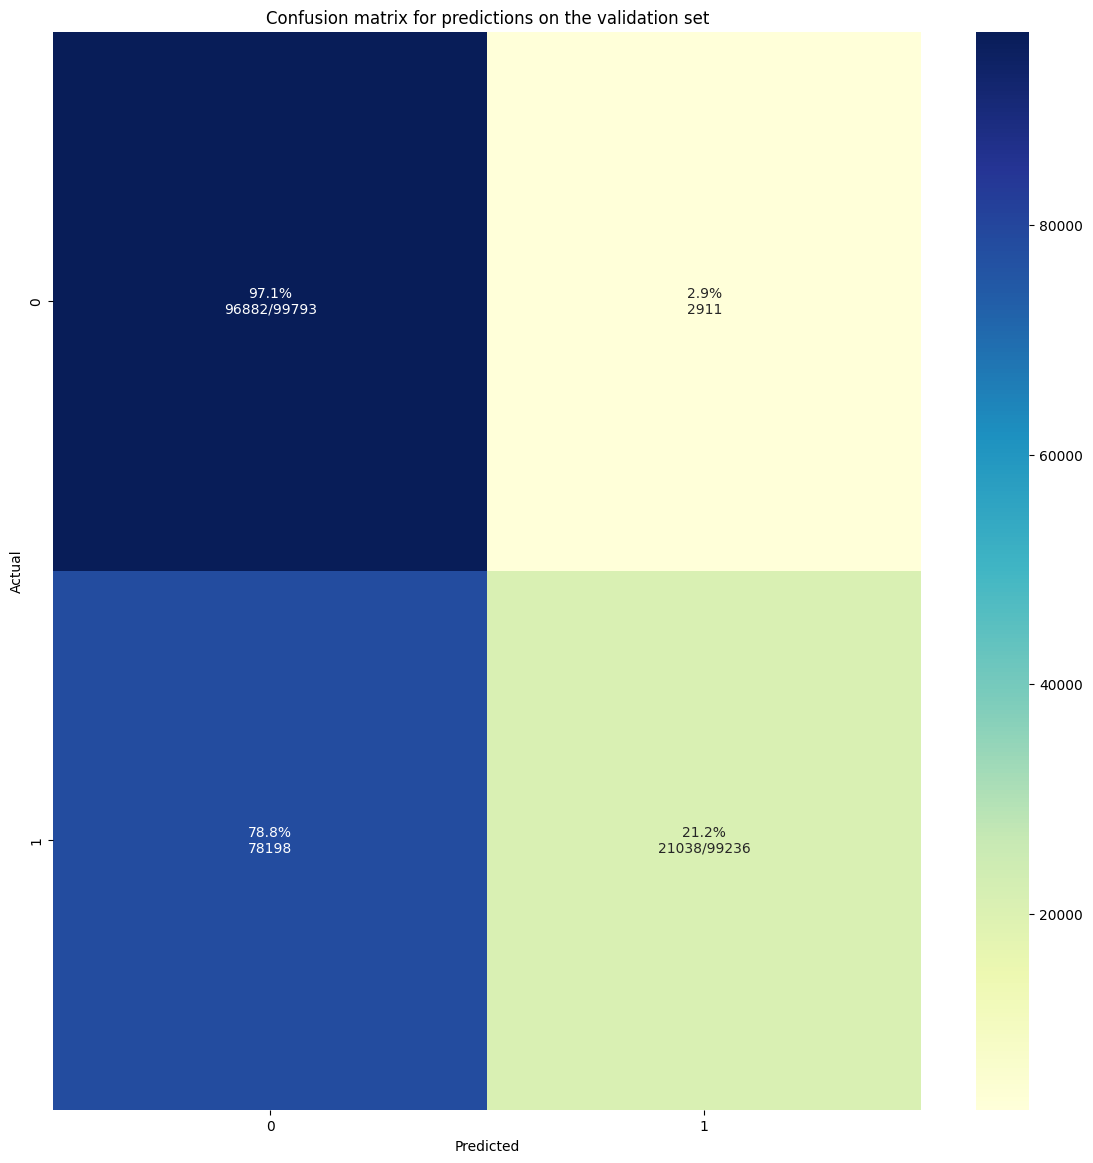

In [167]:
plot_cm(y_test,y_pred, 'Confusion matrix for predictions on the validation set')
f1_score(y_test, y_pred, average = 'macro')

#LogisticRegression

In [168]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()

In [169]:
import time

curr_time= time.time()
lrc.fit(X_train, y_train)
next_time = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [170]:
#thời gian huấn luyện mô hình
next_time - curr_time

18.05349040031433

In [171]:
y_pred = lrc.predict(X_test)

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87     99793
           1       0.84      0.92      0.88     99236

    accuracy                           0.87    199029
   macro avg       0.88      0.87      0.87    199029
weighted avg       0.88      0.87      0.87    199029



0.8726743917508322

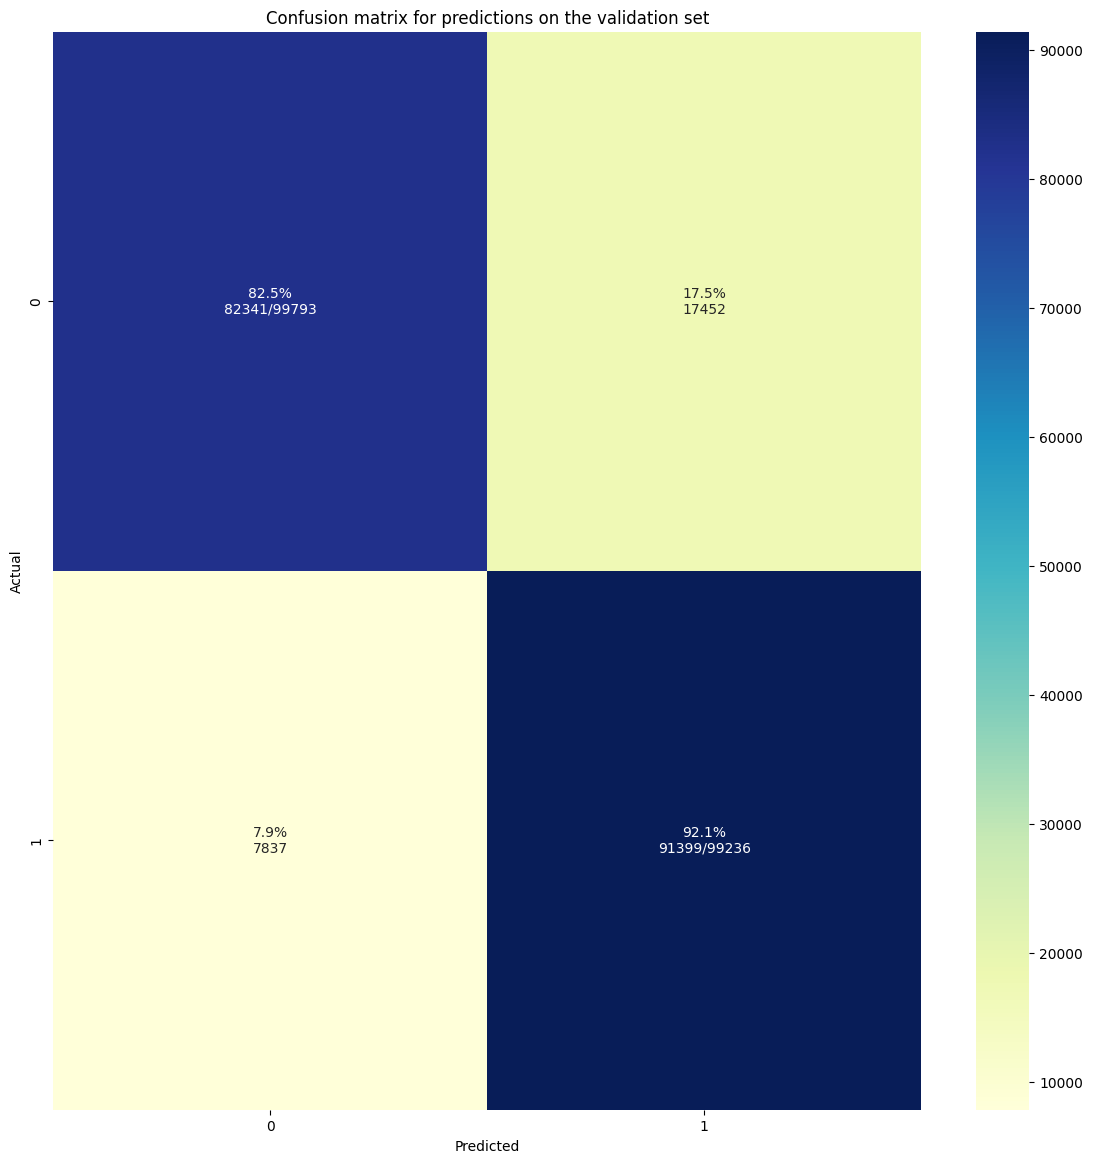

In [173]:
plot_cm(y_test,y_pred, 'Confusion matrix for predictions on the validation set')
f1_score(y_test, y_pred, average = 'macro')

#XGBoost

In [174]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [175]:
import time

curr_time= time.time()
xgb_model.fit(X_train, y_train)
next_time = time.time()

In [176]:
#thời gian huấn luyện mô hình
next_time - curr_time

14.968439102172852

In [177]:
y_pred = xgb_model.predict(X_test)

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99793
           1       1.00      1.00      1.00     99236

    accuracy                           1.00    199029
   macro avg       1.00      1.00      1.00    199029
weighted avg       1.00      1.00      1.00    199029



0.9999497556834037

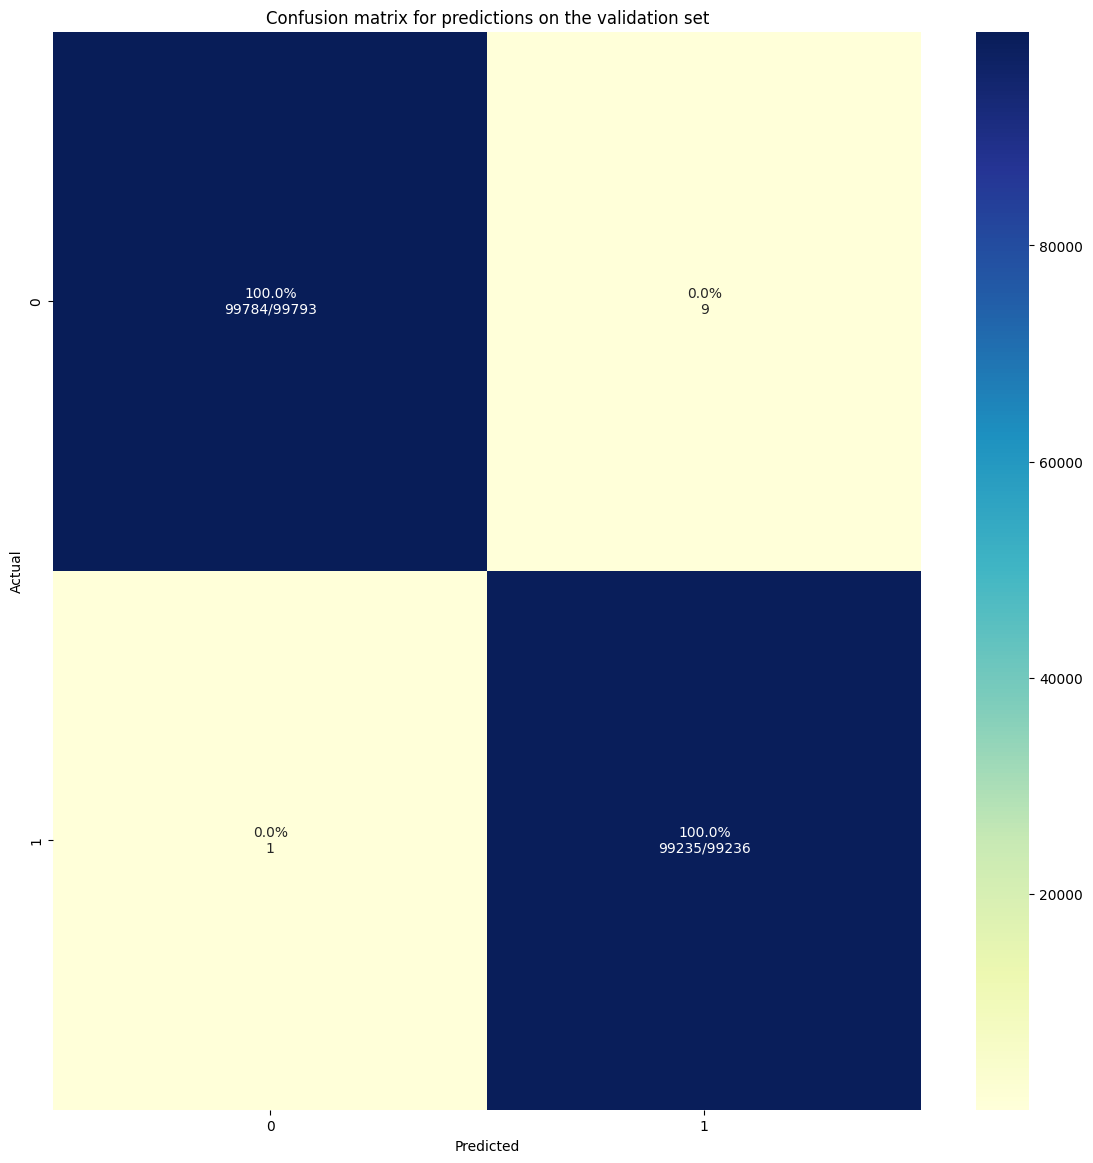

In [179]:
plot_cm(y_test,y_pred, 'Confusion matrix for predictions on the validation set')
f1_score(y_test, y_pred, average = 'macro')